In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt

# parametros del modelo CARMA 
sigmay = 2.3  # dispersion en las series de tiempo 
p = 5  # polinomio autoregresivo AR 
mu = 17.0  # media del modelo 
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0])  # componentes del ancho lorentziano 
qpo_cent = np.array([1.0/5.0, 1.0/25.0])  # componentes lorentzianas del centroide 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) # parametros de la funcion lorentizana para las componentes de la raiz r_k
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
# convierte la variacion del modelo CARMA en variacion en el ruido blanco de conduccion  convert CARMA model variance to variance in the driving white noise
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)  # carma_variance computa la funcion de autocovarianza 


Text(0,0.5,'magnitud')

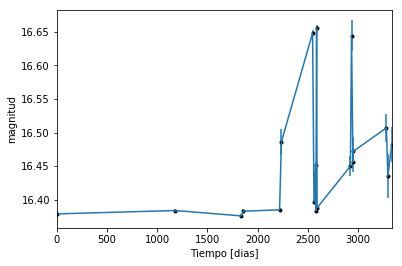

In [3]:
data = np.genfromtxt('LC_G_15818.dat')
juldate = data[:,0]  # El tiempo es tomado por la fecha juliana 
t = juldate - juldate.min()  # ajusta el valor de la primera toma de tiempo a cero, la unidad de t esta dada en dias 
y = data[:,1]  # Mangnitud de la banda 
yerr = data[:,2]  # Desviacion estandar en la medida del ruido 

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('magnitud')

In [4]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [5]:
%%capture capt
sample = model.run_mcmc(20000)


ValueError: maxlags must be None or strictly positive < 19

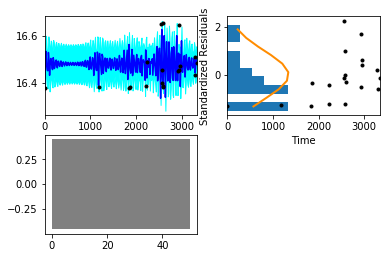

In [6]:
sample.assess_fit()